In [1]:
# Import the standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing our training and test dataset as dataframes
train=pd.read_csv('C:\\Users\\Aayush Kandpal\\Downloads\\train.csv')
test=pd.read_csv('C:\\Users\\Aayush Kandpal\\Downloads\\test.csv')

In [3]:
# Datatypes and size 
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
ID                         88858 non-null object
Estimated_Insects_Count    88858 non-null int64
Crop_Type                  88858 non-null int64
Soil_Type                  88858 non-null int64
Pesticide_Use_Category     88858 non-null int64
Number_Doses_Week          88858 non-null int64
Number_Weeks_Used          79858 non-null float64
Number_Weeks_Quit          88858 non-null int64
Season                     88858 non-null int64
Crop_Damage                88858 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [4]:
# Short summary of our dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
ID                         59310 non-null object
Estimated_Insects_Count    59310 non-null int64
Crop_Type                  59310 non-null int64
Soil_Type                  59310 non-null int64
Pesticide_Use_Category     59310 non-null int64
Number_Doses_Week          59310 non-null int64
Number_Weeks_Used          53417 non-null float64
Number_Weeks_Quit          59310 non-null int64
Season                     59310 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 4.1+ MB


In [5]:
# Some important statistical measures of different features in our dataset
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [7]:
# Checking to see if we have missing values in the given train and test dtasets
train.isnull().sum()


ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [8]:
test.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [9]:
train.shape,test.shape

((88858, 10), (59310, 9))

In [51]:
train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [90]:
test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,28.705094,0,2
1,F00000007,410,1,1,1,0,0.000000,0,2
2,F00000011,626,1,0,1,0,0.000000,0,2
3,F00000013,731,1,0,1,0,0.000000,0,2
4,F00000014,789,0,0,1,0,0.000000,0,1
...,...,...,...,...,...,...,...,...,...
59305,F00155937,3337,1,0,2,20,34.000000,12,1
59306,F00155940,3516,1,0,2,20,32.000000,10,2
59307,F00155941,3702,1,0,2,10,28.705094,48,1
59308,F00155943,3702,1,0,2,10,28.000000,17,2


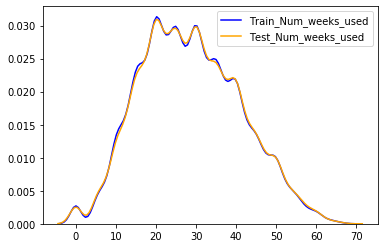

In [12]:
# visulaising the feature with missing values to find an appropriate method to fill the replace the NAN values.
# you can see that the distribution is almost similar for both the train and test set
sns.kdeplot(train.Number_Weeks_Used,color='blue',  shade_lowest=False,label='Train_Num_weeks_used')
sns.kdeplot(test.Number_Weeks_Used,color='orange',  shade_lowest=False,label='Test_Num_weeks_used')

Skew is: 0.24459229017334694


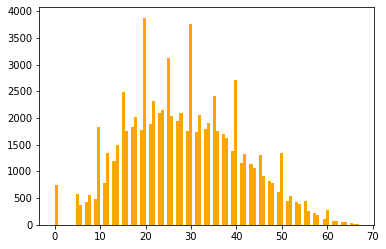

In [10]:
# From the plots below it can be observed that our distribution has normal skew(0<skew<0.3) 
# Log transformation could be used but I have not used any transformation as such as the data is not highly skewed
plt.hist(train.Number_Weeks_Used,bins=100,color='orange')
plt.xlabel
print ("Skew is:", train.Number_Weeks_Used.skew())

Skew is: 0.235308170549648


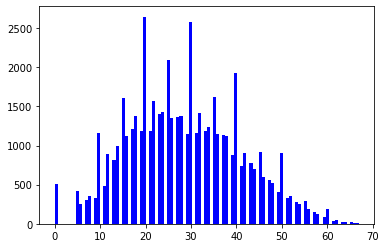

In [14]:
plt.hist(test.Number_Weeks_Used,bins=100,color='blue')
plt.xlabel
print ("Skew is:", test.Number_Weeks_Used.skew())

In [14]:
# Filling missing values with mean of the concerned column
# I tried with mode and median and the best result was obtained with mean
train=train.fillna(train.mean())
test=test.fillna(test.mean())


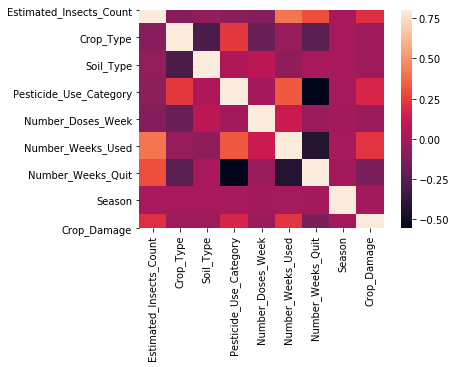

In [60]:
# plotting a correlation matrix to examine the correlation between features and the target variable ( Crop_ Damage)
matrix=train.corr()
p=sns.heatmap(matrix,vmax=0.8,square=True)


In [18]:
# The correlation values of the necessary columns.
corr = train.corr()
print (corr['Crop_Damage'].sort_values(ascending=False)[:], '\n')

Crop_Damage                1.000000
Number_Weeks_Used          0.219621
Estimated_Insects_Count    0.202888
Pesticide_Use_Category     0.175002
Season                    -0.000184
Crop_Type                 -0.016495
Soil_Type                 -0.021997
Number_Doses_Week         -0.030874
Number_Weeks_Quit         -0.133117
Name: Crop_Damage, dtype: float64 



In [43]:
# printing out the name of the columns present in our dataset
train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [111]:
# I have dropped the ID because it does not affect the outcome. The correlation between the ID and the target variable should be ignored
x=train.drop('Crop_Damage',axis=1)
x=x.drop('ID',axis=1)
y=train.iloc[:,-1]

# Combinations of different features were used to improve the model.The best accuracy was obtained with the above combination.

In [112]:
# creating a validation test set by splitting the existing train set. The model will be trained on 80 % of the given train set 
# and will be applied on the validation test set 
# Finally this model will be fit on the given test setb to make a submission file

from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(x,y,random_state=0,test_size=0.2)

# Feature scaling

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X_train=sc.fit_transform(X_train)
X_val=sc.transform(X_val)

In [113]:
X_train

array([[0.16214847, 1.        , 0.        , ..., 0.2238806 , 0.26      ,
        0.5       ],
       [0.442868  , 0.        , 0.        , ..., 0.62686567, 0.18      ,
        0.        ],
       [0.14745376, 1.        , 0.        , ..., 0.50746269, 0.        ,
        0.5       ],
       ...,
       [0.31289587, 0.        , 1.        , ..., 0.42722343, 0.48      ,
        0.        ],
       [0.26906511, 0.        , 0.        , ..., 0.42722343, 0.        ,
        0.5       ],
       [0.02052192, 1.        , 0.        , ..., 0.3880597 , 0.06      ,
        0.        ]])

In [114]:
X_val

array([[0.60577654, 0.        , 1.        , ..., 0.37313433, 0.52      ,
        1.        ],
       [0.21129972, 1.        , 0.        , ..., 0.28358209, 0.34      ,
        1.        ],
       [0.8074487 , 0.        , 1.        , ..., 0.42722343, 0.72      ,
        1.        ],
       ...,
       [0.21129972, 1.        , 0.        , ..., 0.50746269, 0.02      ,
        0.        ],
       [0.60577654, 1.        , 0.        , ..., 0.42722343, 0.32      ,
        0.        ],
       [0.6060299 , 1.        , 0.        , ..., 0.64179104, 0.12      ,
        0.5       ]])

In [115]:
y_train

43097    0
62169    0
13255    0
50178    0
2999     0
        ..
21243    0
45891    0
42613    0
43567    0
68268    0
Name: Crop_Damage, Length: 71086, dtype: int64

In [116]:
y_val

17336    1
2349     0
58083    1
75986    0
15485    0
        ..
38311    1
69017    2
55706    0
7583     0
61036    1
Name: Crop_Damage, Length: 17772, dtype: int64

Alive 74238
Damage dueto Other causes 12307
Damage due to Pesticides 2313


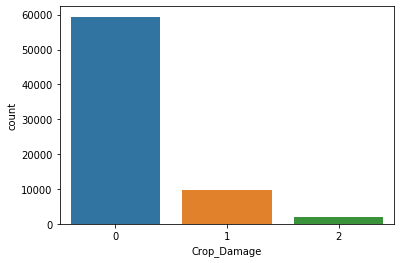

In [117]:
# Plotting some graphs
ax = sns.countplot(y_train,label="Count")      
A,B,C= y.value_counts()
print('Alive',A)
print('Damage dueto Other causes',B)
print('Damage due to Pesticides',C)


In [118]:
# Importing some libraries to help us create our model.
# Some standard classifiers have beeen used 
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

lgbm=LGBMClassifier()    
lgbm.fit(X_train,y_train)

lr=LogisticRegression()
lr.fit(X_train,y_train)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

kn=KNeighborsClassifier()
kn.fit(X_train,y_train)

xg=XGBClassifier()
xg.fit(X_train,y_train)

cb=CatBoostClassifier() # 1000 iterations, it willt take a minute 
cb.fit(X_train,y_train)







Learning rate set to 0.098348
0:	learn: 0.9809636	total: 18.2ms	remaining: 18.2s
1:	learn: 0.8926160	total: 34.5ms	remaining: 17.2s
2:	learn: 0.8225302	total: 50.6ms	remaining: 16.8s
3:	learn: 0.7655183	total: 66.7ms	remaining: 16.6s
4:	learn: 0.7188895	total: 82.8ms	remaining: 16.5s
5:	learn: 0.6798905	total: 98.6ms	remaining: 16.3s
6:	learn: 0.6467645	total: 115ms	remaining: 16.3s
7:	learn: 0.6193238	total: 133ms	remaining: 16.5s
8:	learn: 0.5952953	total: 149ms	remaining: 16.4s
9:	learn: 0.5745224	total: 165ms	remaining: 16.4s
10:	learn: 0.5573350	total: 181ms	remaining: 16.3s
11:	learn: 0.5417934	total: 209ms	remaining: 17.2s
12:	learn: 0.5289802	total: 229ms	remaining: 17.4s
13:	learn: 0.5173238	total: 246ms	remaining: 17.3s
14:	learn: 0.5082732	total: 259ms	remaining: 17s
15:	learn: 0.4991190	total: 275ms	remaining: 16.9s
16:	learn: 0.4909632	total: 292ms	remaining: 16.9s
17:	learn: 0.4837525	total: 314ms	remaining: 17.1s
18:	learn: 0.4781897	total: 330ms	remaining: 17s
19:	learn

In [119]:
ylgbm=lgbm.predict(X_val)
ylr=lr.predict(X_val)
yrf=rf.predict(X_val)
ygb=gb.predict(X_val)
ykn=kn.predict(X_val)
yxg=xg.predict(X_val)
ycb=cb.predict(X_val)

In [126]:
from sklearn.metrics import accuracy_score
print('Accuracy Score using LGBM:',accuracy_score(y_val,ylgbm))
from sklearn.metrics import classification_report
print(classification_report(y_val,ylgbm))

print('Accuracy Score using Logistic Regression Classifier:',accuracy_score(y_val,ylr))
print(classification_report(y_val,ylr))

print('Accuracy Score using Random Forest Classifier:',accuracy_score(y_val,ylr))
print(classification_report(y_val,ylr))

print('Accuracy Score using Gradient Boosting Classfier:',accuracy_score(y_val,ylr))
print(classification_report(y_val,ylr))

print('Accuracy Score using Knearest Classifier:',accuracy_score(y_val,ylr))
print(classification_report(y_val,ylr))

print('Accuracy Score using XGBoost Classifier:',accuracy_score(y_val,ylr))
print(classification_report(y_val,ylr))

print('Accuracy Score using CatBoost Classifier:',accuracy_score(y_val,ylr))
print(classification_report(y_val,ylr))




Accuracy Score using LGBM: 0.8483569660139545
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     14848
           1       0.57      0.18      0.28      2473
           2       0.00      0.00      0.00       451

    accuracy                           0.85     17772
   macro avg       0.48      0.39      0.40     17772
weighted avg       0.80      0.85      0.81     17772

Accuracy Score using Logistic Regression Classifier: 0.8319266261534999
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     14848
           1       0.37      0.05      0.09      2473
           2       0.00      0.00      0.00       451

    accuracy                           0.83     17772
   macro avg       0.40      0.35      0.33     17772
weighted avg       0.75      0.83      0.77     17772

Accuracy Score using Random Forest Classifier: 0.8319266261534999
              precision    recall  f1-score   support


In [ ]:
# Hence the highest accuracy obtained is 84.8 % with the use of LGBM Classifier 


In [20]:
# Creating the submission file with the help of the LGBM Classifier

In [127]:
test
# Dropping the ID column 
x_test=test.drop('ID',axis=1)

In [128]:
x_test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,28.705094,0,2
1,410,1,1,1,0,0.000000,0,2
2,626,1,0,1,0,0.000000,0,2
3,731,1,0,1,0,0.000000,0,2
4,789,0,0,1,0,0.000000,0,1
...,...,...,...,...,...,...,...,...
59305,3337,1,0,2,20,34.000000,12,1
59306,3516,1,0,2,20,32.000000,10,2
59307,3702,1,0,2,10,28.705094,48,1
59308,3702,1,0,2,10,28.000000,17,2


In [133]:
x_test.shape,X_train.shape

((59310, 8), (71086, 8))

In [129]:
yfinal=lgbm.predict(x_test)

In [124]:
submission = pd.DataFrame({ 'ID': test.ID, 'Crop_Damage': yfinal})
submission.to_csv("my_submission.csv", index=False)

In [130]:
yfinal

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)